In [3]:
from google.colab import files
uploaded = files.upload()

Saving diabetes_012_health_indicators_BRFSS2015.csv to diabetes_012_health_indicators_BRFSS2015 (1).csv


In [5]:
# Install necessary libraries (if not already installed)
!pip install shap lime --quiet

# Import core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(context="notebook", style="whitegrid")


In [6]:
import pandas as pd
import io
from google.colab import files

# Assuming you've already run: uploaded = files.upload()
# Get the first file's name from the uploaded dictionary
file_name = list(uploaded.keys())[0]

# Read the data into a pandas DataFrame called 'data'
data = pd.read_csv(io.BytesIO(uploaded[file_name]))

# Display the first 5 rows of the dataset
print(data.head())

   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0   
1     

3. Explore the Dataset

In [11]:
# Overview of the dataset
data.info()

# Summary statistics
data.describe()

# Check for missing values
print("Missing values per column:")
print(data.isnull().sum())

# Check unique values for each column
print("Unique values per column:")
print(data.nunique())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

b) Target Variable Distribution

<ipython-input-7-511dba13287e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=target_column, palette='Set2')


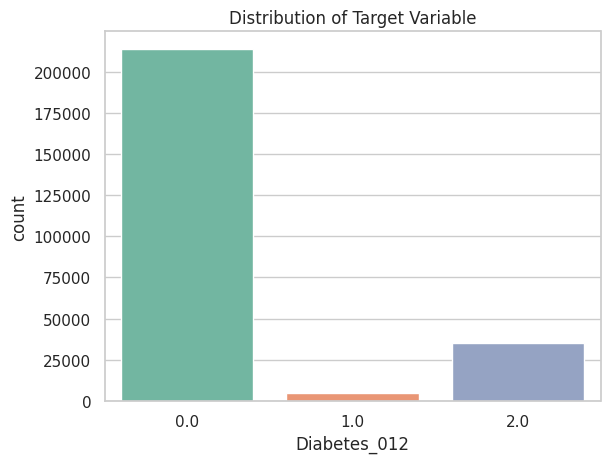

Target Variable Distribution (%):
Diabetes_012
0.0    84.241170
2.0    13.933302
1.0     1.825528
Name: proportion, dtype: float64


In [7]:
# Distribution of the target variable
target_column = 'Diabetes_012'  # Change to your target column name
sns.countplot(data=data, x=target_column, palette='Set2')
plt.title('Distribution of Target Variable')
plt.show()

# Percentage distribution of target variable
print("Target Variable Distribution (%):")
print(data[target_column].value_counts(normalize=True) * 100)


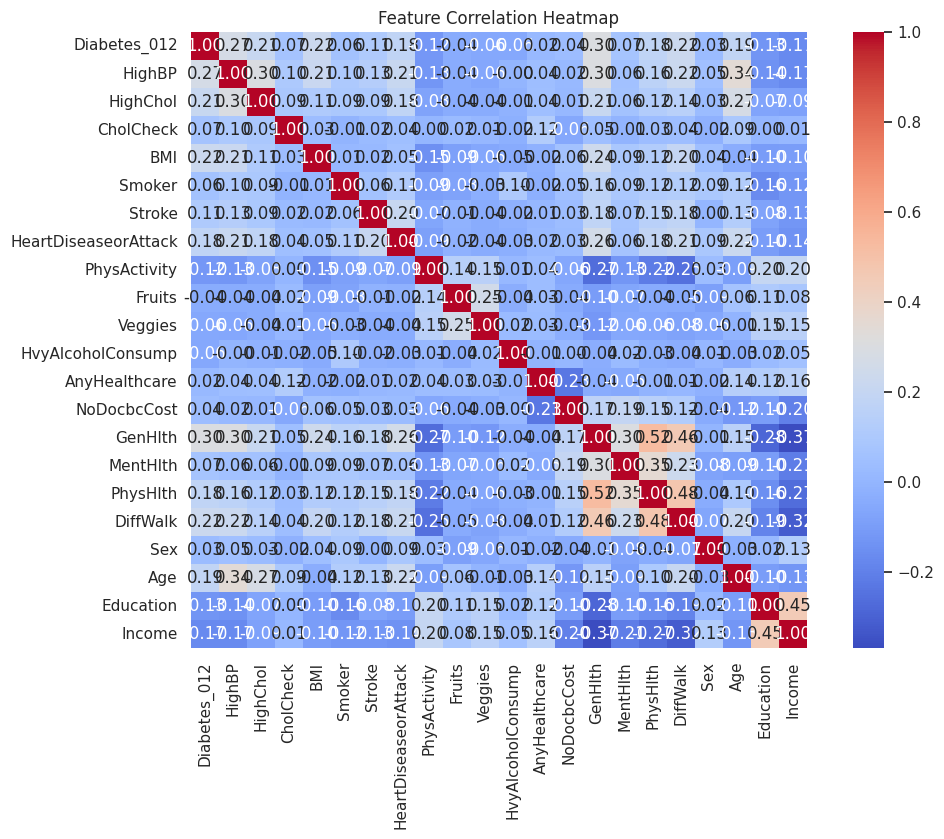

In [13]:
# Compute and visualize correlation
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Feature Correlation Heatmap')
plt.show()


b) Pairplot of Key Features

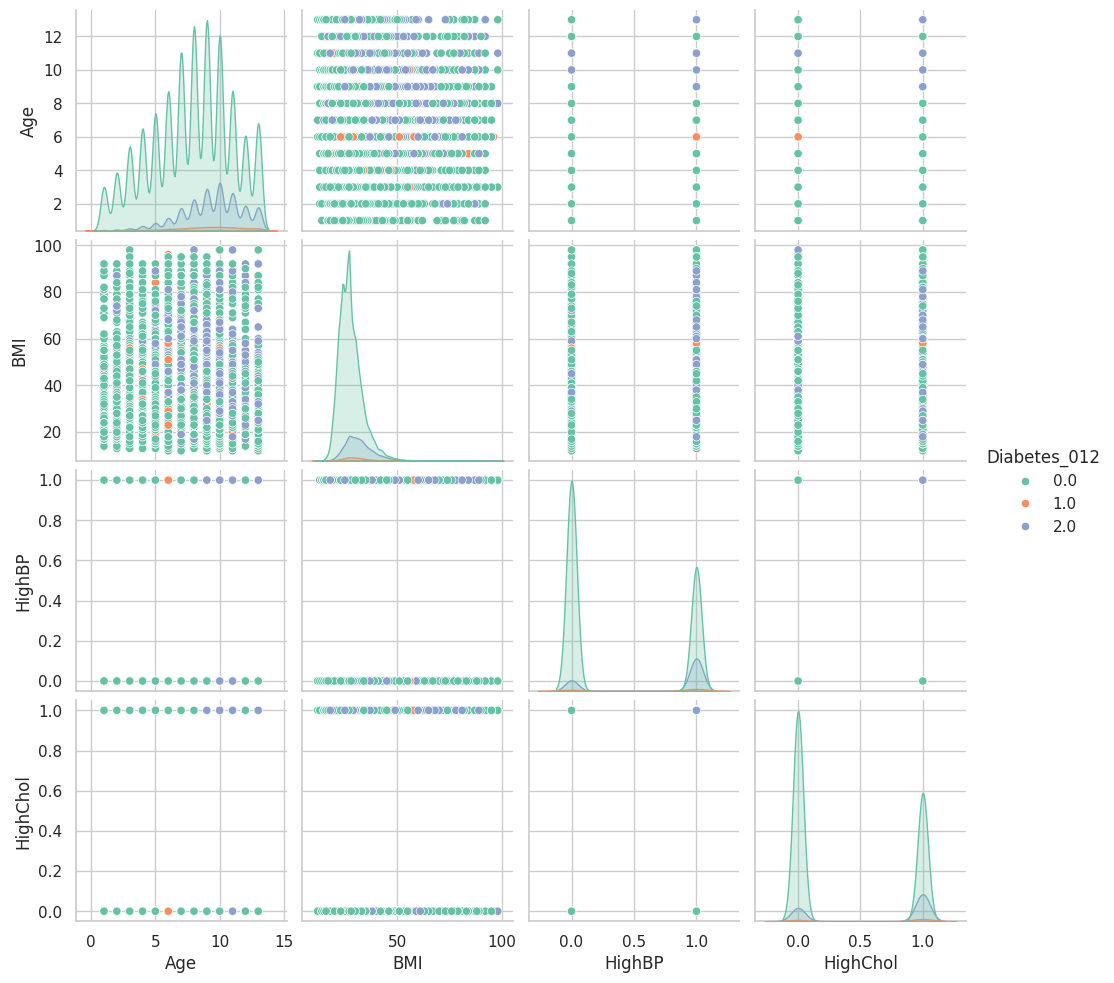

In [14]:
# Select features for pairplot
selected_features = ['Age', 'BMI', 'HighBP', 'HighChol', target_column]  # Customize this list
sns.pairplot(data[selected_features], hue=target_column, palette='Set2')
plt.show()


c) Boxplots for Feature Analysis

<ipython-input-16-7d435ce054f3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target_column, y='BMI', palette='Set2')  # Change 'BMI' to a numeric feature


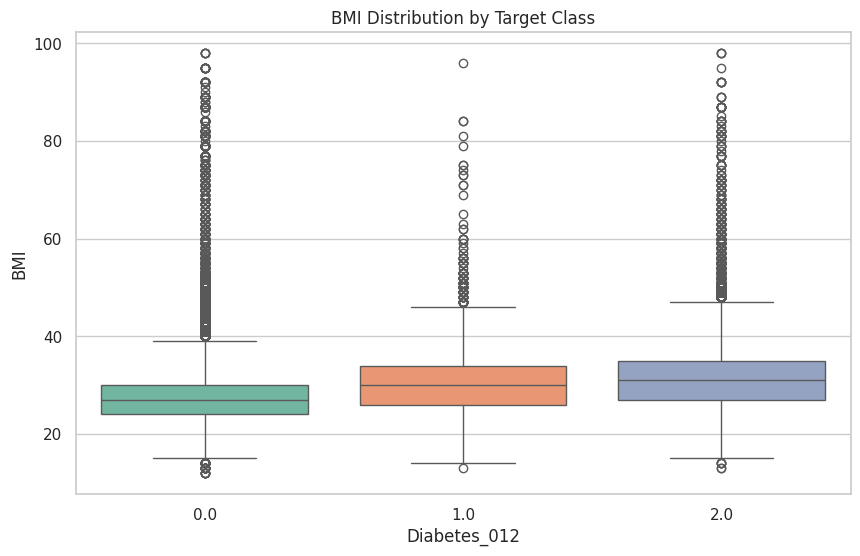

In [16]:
# Boxplot of a continuous feature against the target variable
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x=target_column, y='BMI', palette='Set2')  # Change 'BMI' to a numeric feature
plt.title('BMI Distribution by Target Class')
plt.show()


5. Missing Data and Outlier Detection

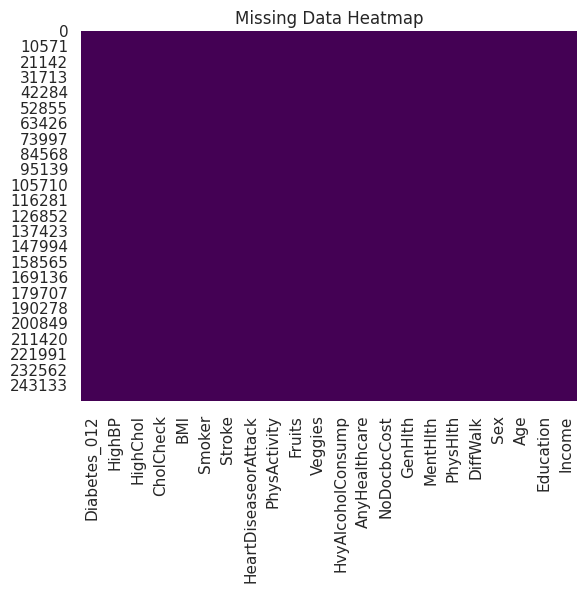

In [17]:
# Visualize missing data
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()


b) Outliers using Boxplots

<ipython-input-19-553adff419d4>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, y=col, palette='Set2')
<ipython-input-19-553adff419d4>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, y=col, palette='Set2')
<ipython-input-19-553adff419d4>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, y=col, palette='Set2')
<ipython-input-19-553adff419d4>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` fo

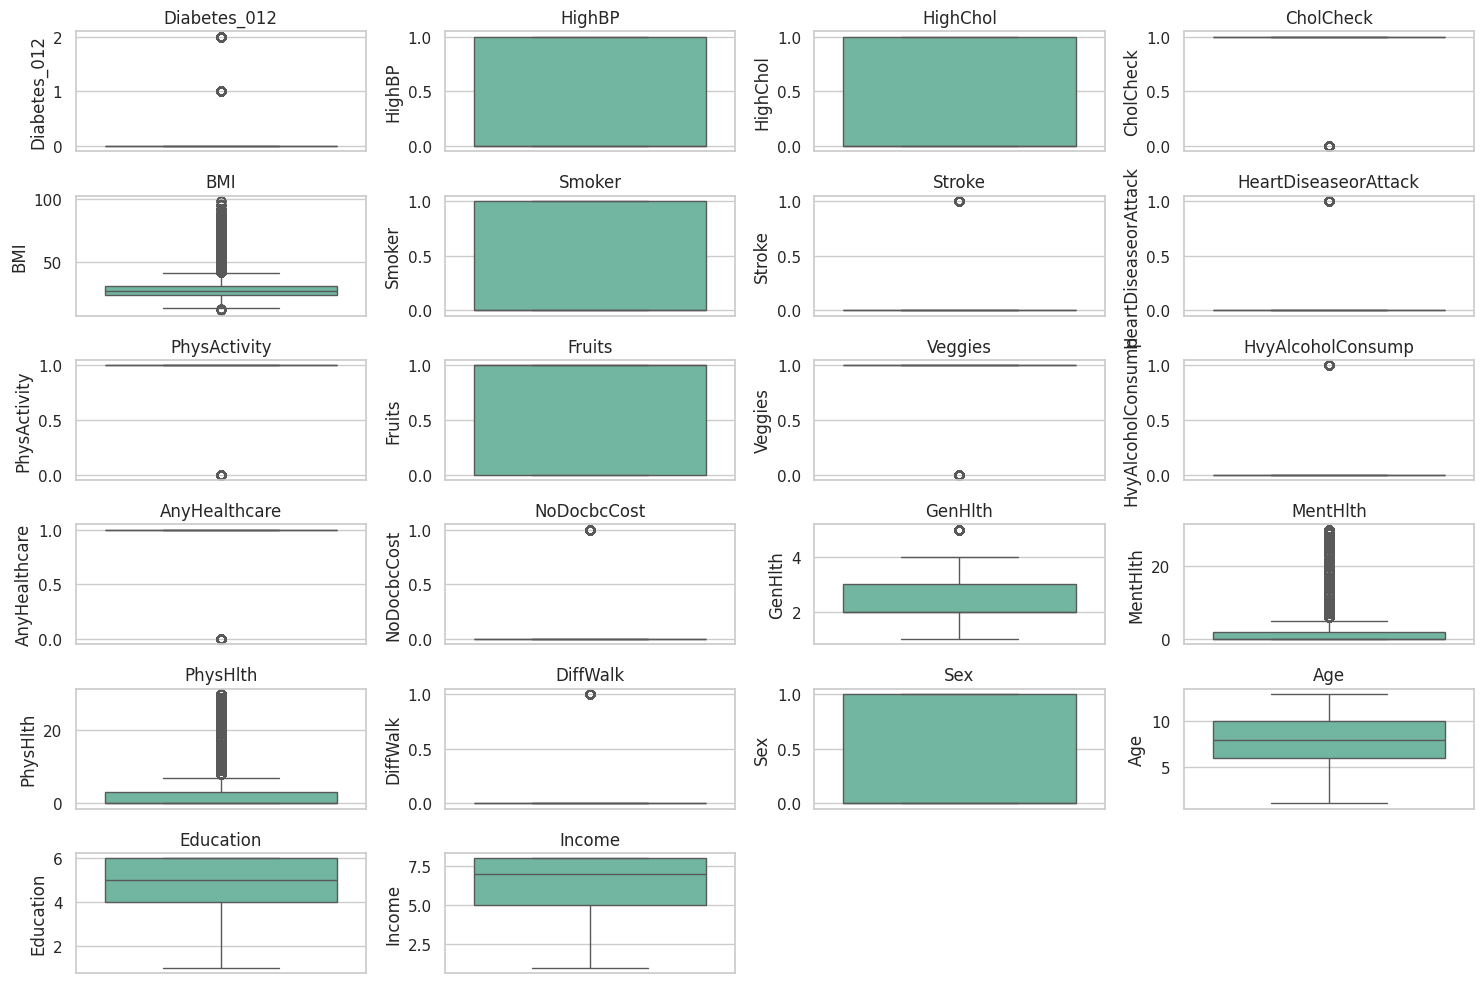

In [ ]:
# Outlier visualization for numerical features
numeric_columns = data.select_dtypes(include=np.number).columns

# Calculate the number of rows and columns for the subplot grid
num_cols = 4  # Number of columns in the grid
num_rows = int(np.ceil(len(numeric_columns) / num_cols))  # Calculate rows needed

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, start=1):
    plt.subplot(num_rows, num_cols, i)  # Use calculated rows and columns
    sns.boxplot(data=data, y=col, palette='Set2')
    plt.title(col)

plt.tight_layout()
plt.show()


6. Insights from Class Imbalance

<ipython-input-8-f2dcf1533f34>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=target_column, palette='Set3')


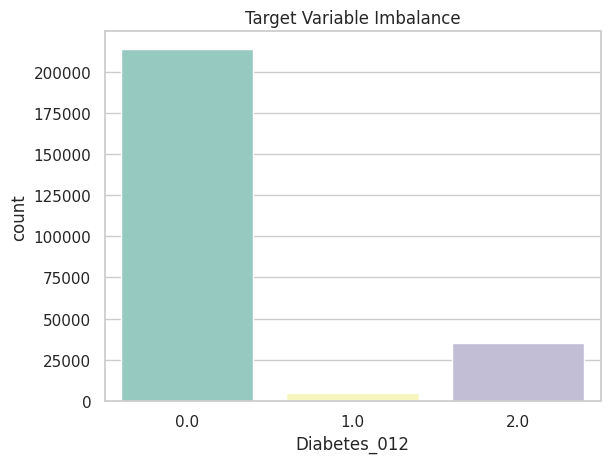

In [8]:
# Visualize imbalance in the target variable
sns.countplot(data=data, x=target_column, palette='Set3')
plt.title('Target Variable Imbalance')
plt.show()

# Optionally print oversampling/undersampling strategies here later


7. Summary Statistics for Groups

Group-wise Mean Statistics:
                HighBP  HighChol  CholCheck        BMI    Smoker    Stroke  \
Diabetes_012                                                                 
0.0           0.371132  0.379171   0.957104  27.742521  0.429680  0.031628   
1.0           0.629022  0.620816   0.986612  30.724466  0.492766  0.057223   
2.0           0.752674  0.670118   0.993182  31.944011  0.518220  0.092457   

              HeartDiseaseorAttack  PhysActivity    Fruits   Veggies  ...  \
Diabetes_012                                                          ...   
0.0                       0.071833      0.779077  0.643023  0.821439  ...   
1.0                       0.143382      0.678471  0.602246  0.768948  ...   
2.0                       0.222882      0.630538  0.585441  0.756408  ...   

              AnyHealthcare  NoDocbcCost   GenHlth  MentHlth  PhysHlth  \
Diabetes_012                                                             
0.0                0.949739     0.079610  2.372

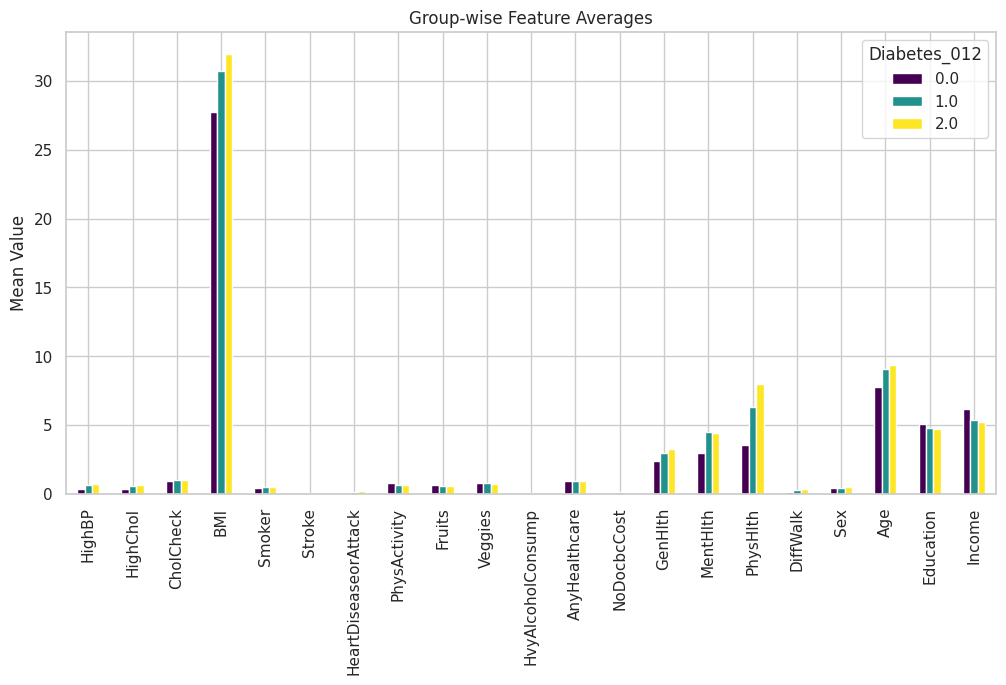

In [19]:
# Grouped statistics based on target variable
group_stats = data.groupby(target_column).mean()
print("Group-wise Mean Statistics:")
print(group_stats)

# Visualization of grouped statistics
group_stats.T.plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.title('Group-wise Feature Averages')
plt.ylabel('Mean Value')
plt.show()


2. Ensemble Learning Techniques
(a) Bagging: Random Forest


In [9]:
!pip install scikit-learn
from sklearn.model_selection import train_test_split # Importing the necessary function
from sklearn.preprocessing import StandardScaler # Import StandardScaler

# Split features and target
X = data.drop(columns=['Diabetes_012'])
y = data['Diabetes_012']

# Split the dataset into training and testing sets (80-20 split, stratified for imbalance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1, class_weight="balanced")

# Cross-validation
rf_cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='f1_weighted')

# Train and evaluate
rf_model.fit(X_train_scaled, y_train)
rf_predictions = rf_model.predict(X_test_scaled)

# Evaluation
print("Random Forest CV F1 Score:", rf_cv_scores.mean())
print("Classification Report:\n", classification_report(y_test, rf_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_predictions))


Random Forest CV F1 Score: 0.8005087832920083
Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.97      0.91     42741
         1.0       0.00      0.00      0.00       926
         2.0       0.47      0.16      0.24      7069

    accuracy                           0.84     50736
   macro avg       0.44      0.38      0.38     50736
weighted avg       0.79      0.84      0.80     50736

Confusion Matrix:
 [[41414   126  1201]
 [  862     0    64]
 [ 5937    16  1116]]


(b) Boosting: XGBoost

In [24]:
from xgboost import XGBClassifier

# XGBoost Classifier
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="mlogloss")
xgb_cv_scores = cross_val_score(xgb_model, X_train_scaled, y_train, cv=5, scoring='f1_weighted')

# Train and evaluate
xgb_model.fit(X_train_scaled, y_train)
xgb_predictions = xgb_model.predict(X_test_scaled)

# Evaluation
print("XGBoost CV F1 Score:", xgb_cv_scores.mean())
print("Classification Report:\n", classification_report(y_test, xgb_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_predictions))


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:03:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:04:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:04:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:04:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:04:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost CV F1 Score: 0.8119375160989619
Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     42741
         1.0       0.00      0.00      0.00       926
         2.0       0.54      0.19      0.28      7069

    accuracy                           0.85     50736
   macro avg       0.47      0.39      0.40     50736
weighted avg       0.80      0.85      0.81     50736

Confusion Matrix:
 [[41714     1  1026]
 [  828     0    98]
 [ 5724     0  1345]]


(c) Stacking

In [ ]:
!pip install xgboost scikit-learn
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler # Import StandardScaler


# ... (rest of your code to define X_train and y_train) ...


# Scale the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # Assuming you have X_train defined

# Base models with reduced complexity (adjust parameters further if needed)
base_models = [
    ('rf', RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=50, max_depth=10)),  # Reduced n_estimators and max_depth
    ('xgb', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="mlogloss", n_estimators=50, max_depth=5))  # Reduced n_estimators and max_depth
]

# Meta-model
meta_model = LogisticRegression()

# Stacking Classifier with StratifiedKFold for potentially faster CV
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, n_jobs=-1)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # Use StratifiedKFold for potentially faster CV
stacking_cv_scores = cross_val_score(stacking_model, X_train_scaled, y_train, cv=cv, scoring='f1_weighted')

# Train and evaluate
stacking_model.fit(X_train_scaled, y_train)
stacking_predictions = stacking_model.predict(X_test_scaled)

# Evaluation
print("Stacking CV F1 Score:", stacking_cv_scores.mean())
print("Classification Report:\n", classification_report(y_test, stacking_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, stacking_predictions))


(d) Voting

In [ ]:
from sklearn.ensemble import VotingClassifier

# Voting Classifier
voting_model = VotingClassifier(estimators=base_models, voting='soft', n_jobs=-1)
voting_cv_scores = cross_val_score(voting_model, X_train_scaled, y_train, cv=5, scoring='f1_weighted')

# Train and evaluate
voting_model.fit(X_train_scaled, y_train)
voting_predictions = voting_model.predict(X_test_scaled)

# Evaluation
print("Voting CV F1 Score:", voting_cv_scores.mean())
print("Classification Report:\n", classification_report(y_test, voting_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, voting_predictions))


Voting CV F1 Score: 0.8112220727850861
Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     42741
         1.0       0.00      0.00      0.00       926
         2.0       0.55      0.19      0.28      7069

    accuracy                           0.85     50736
   macro avg       0.47      0.39      0.40     50736
weighted avg       0.80      0.85      0.81     50736

Confusion Matrix:
 [[41739     0  1002]
 [  832     0    94]
 [ 5732     0  1337]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


4. Explainable AI (XAI)

In [ ]:
import os
import shap
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd  # Import pandas for data handling

# Print the current working directory
print(os.getcwd())

# Change the working directory to the directory where your file is located
# Replace '/path/to/your/file' with the actual path
# For example, if the file is in the 'data' folder within your current directory:
# os.chdir('/path/to/your/file')
#os.chdir('data')
# Load your dataset
data = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')
X = data.drop('Diabetes_012', axis=1)  # Assuming 'Diabetes_012' is the target column
y = data['Diabetes_012']

# Assuming X and y are your original data
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Instantiate and train the RandomForestClassifier model
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_model.fit(X_train_scaled, y_train)  # Assuming X_train_scaled and y_train are your training data

# SHAP Explainer for the best model
# Initialize the explainer object, for example: explainer = shap.TreeExplainer(rf_model)
explainer = shap.TreeExplainer(rf_model) # Corrected line to initialize explainer

/content


(b) LIME

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=cd93a5a00df6d27cefb8fb1c77c15b44561410a50a0f875e02dffa1533cb2928
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
from lime.lime_tabular import LimeTabularExplainer # Import LimeTabularExplainer from lime

# LIME Explainer
lime_explainer = LimeTabularExplainer(
    X_train_scaled, training_labels=y_train, feature_names=X.columns, class_names=['No Diabetes', 'Pre-Diabetes', 'Diabetes'], mode='classification'
)

# Scale the test data using the same scaler used for training data
X_test_scaled = scaler.transform(X_test)  # This line is added

# Explain a single prediction
lime_exp = lime_explainer.explain_instance(X_test_scaled[0], rf_model.predict_proba)
lime_exp.show_in_notebook()